# Topic: Prediction using Unsupervised ML

# The Sparks Foundation #GRIPFEB21

# Name: Tanya Walia

# KNN

Here we'll implement KNN technique for a dataset called Iris Dataset

Let's start with importing our dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn


## Introduction to KNN

Knn is the simplest machine learning algorithm. It is based on measuring the distances between the test data and each of the training data to decide the final output. It's a supervised learning algorithm.

E:\Python\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


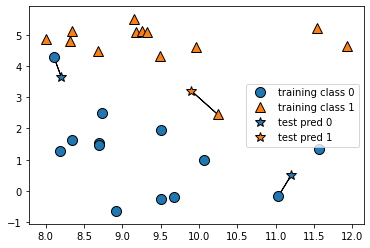

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)    # plotting the knn classification of forge dataset

E:\Python\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


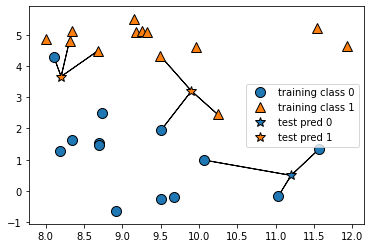

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

To build our model , let's start with importing our iris data 

In [4]:
df = pd.read_csv('Iris.csv')

## Exploring the data
To get the basic intution about the data, we need to explore it.

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

We need to classify the "Species" of the flower , so we'll keep it as *y*(dependent variable) and rest as *X*(independent variables)

In [7]:
X = df.drop(['Species','Id'],axis=1,inplace=False)    # Note: inplace= False , i.e. we're not dropping that column from df
y = df['Species']

We dropped 'Id' , since it has no importance in predicting the Species

In [8]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y=encoder.fit_transform(y)     # LabelEncoder encodes the categorical value in numeric

In [11]:
y=pd.Series(y)
y.value_counts()

2    50
1    50
0    50
dtype: int64

## Plot the data
Not let's do some basic plotting

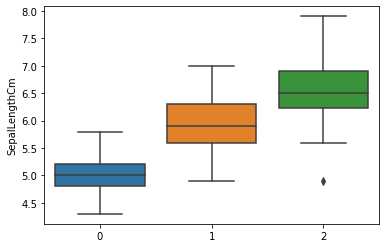

In [12]:
sns.boxplot(y,df['SepalLengthCm'])

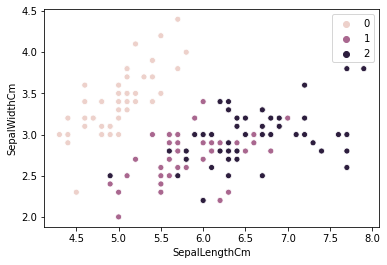

In [13]:
sns.scatterplot(df['SepalLengthCm'],df['SepalWidthCm'],hue=y)

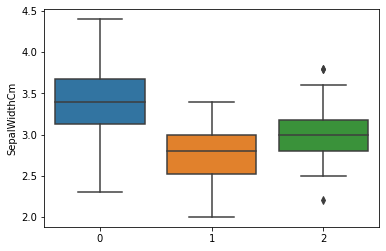

In [14]:
sns.boxplot(y,df['SepalWidthCm'])

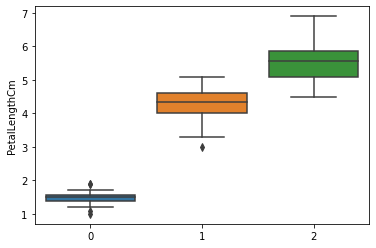

In [15]:
sns.boxplot(y,df['PetalLengthCm'])

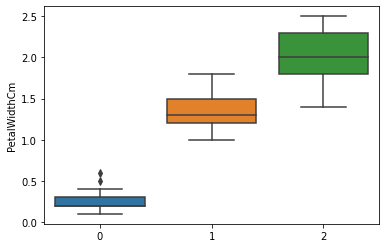

In [16]:
sns.boxplot(y,df['PetalWidthCm'])

By looking at the boxplots , we can get a basic idea about the species and their sepal & petal dimensions.

# Predicting the value of optimum number of questions

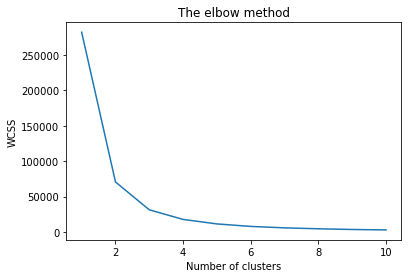

In [17]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

## Building The Model

Now we'll build our first machine learning model 

KNN is already implemented in Scikit-Learn Library, we'll import it and use it in our data

In [18]:
from sklearn.neighbors import KNeighborsClassifier    #importing the model

In [19]:
clf = KNeighborsClassifier(n_neighbors=2)    #initializing the model as clf

### Spliting the data
Before we train our model, we must divide the datasets into 2 categories 
1. train set
2. test set

To check how our models do with new data

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 4)
(100,)
(50, 4)
(50,)


### Training the model
Now let's train the model using *fit()* function

In [22]:
clf.fit(X=X_train,y=y_train)

KNeighborsClassifier(n_neighbors=2)

### Prediction

To predict the species of new data , we can use *predict()* function

In [23]:
pred = clf.predict(X_test)

In [24]:
pred

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       1, 0, 0, 0, 2, 0])

## Evaluating the Model

Let's Evaluate how our model is performing .

In [25]:
print("Train set Score : ",(clf.score(X_train,y_train)))
print("Test set Score : ",(clf.score(X_test,y_test)))

Train set Score :  1.0
Test set Score :  0.9


Our model is doing pretty well !
Now let's try to change the value of n-neighbors and see how it effects the score.

## Trying different values of K

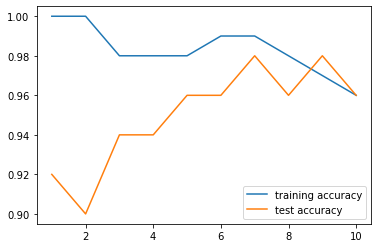

In [26]:
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()

As you can see the training accuracy is decreasing with the increase in value of K and test set accuracy is decreasing as the value of k is increasing.
We can say that the model is **Genralizing** around the value 6-7 , so it'll be the best value for k.

In [27]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()

In [28]:
clf.fit(X=X_train,y=y_train)

GaussianNB()

In [29]:
print("Train set Score : ",(clf.score(X_train,y_train)))
print("Test set Score : ",(clf.score(X_test,y_test)))

Train set Score :  0.98
Test set Score :  0.92
